# Direction Cosine Matrix

A Direction Cosine Matrix (DCM) is a 3x3 rotation matrix that represents the orientation of one coordinate frame relative to another. Each element of the DCM is the cosine of the angle between a coordinate axis of one frame and a coordinate axis of the other, and the matrix effectively transforms vectors and coordinates from one frame to another.

In [ ]:
!pip install numpy sympy matplotlib

import numpy as np
import sympy as sm
from sympy.physics.vector import *
import matplotlib.pyplot as plt

---

## Properties of DCM

Given the reference frame \( N \), let the unit base vectors of the coordinate frame \( B \) in the reference frame \( N \) be:

$$
\hat{b}_1 = \frac{1}{3} \begin{pmatrix} 1 \\ 2 \\ -2 \end{pmatrix}, \quad
\hat{b}_2 = \frac{1}{\sqrt{2}} \begin{pmatrix} 0 \\ 1 \\ 1 \end{pmatrix}, \quad
\hat{b}_3 = \frac{1}{3\sqrt{2}} \begin{pmatrix} 4 \\ -1 \\ 1 \end{pmatrix}
$$

where the base vector components are written in the \( N \) frame.

To verify that the matrix [BN] is orthogonal, we need to check the following condition:

$$
[BN]^T [BN] = \mathbf{I}
$$


The matrix [BN] is orthogonal if and only if the result of this multiplication is the identity matrix. This means the transformation between the coordinate frames preserves angles and lengths, and the base vectors in \( B \) are mutually orthogonal and normalized.


In [2]:
b1 = sm.Rational(1, 3) * sm.Array([1, 2, -2])
b2 = (1 / sm.sqrt(2)) * sm.Array([0, 1, 1])
b3 = (1 / (3 * sm.sqrt(2))) * sm.Array([4, -1, 1])

BN = sm.Matrix([b1, b2, b3])

print("DCM [BN]:")
print(np.array(BN).astype(np.float64))

DCM [BN]:
[[ 0.33333333  0.66666667 -0.66666667]
 [ 0.          0.70710678  0.70710678]
 [ 0.94280904 -0.23570226  0.23570226]]


In [3]:
BN_transpose = BN.T

print("DCM [BN]^T:")
print(np.array(BN_transpose).astype(np.float64))

DCM [BN]^T:
[[ 0.33333333  0.          0.94280904]
 [ 0.66666667  0.70710678 -0.23570226]
 [-0.66666667  0.70710678  0.23570226]]


In [4]:
identity_matrix = np.dot(BN_transpose, BN)

print("\n[BN]^T * [BN] (Numerical):")
print(np.array(identity_matrix).astype(np.float64))


[BN]^T * [BN] (Numerical):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [5]:
if np.allclose(identity_matrix, np.eye(3)):
    print("\nThe matrix [BN] is orthogonal!")
else:
    print("\nThe matrix [BN] is not orthogonal.")


The matrix [BN] is orthogonal!


---

## Exercise

## 1.
Given three reference frames \( N \), \( B \), and \( F \), let the unit base vectors of the coordinate frames \( B \) and \( F \) be:

$$
\hat{{b}}_1 = \frac{1}{3} \begin{pmatrix} 1 \\ 2 \\ -2 \end{pmatrix}, \quad
\hat{{b}}_2 = \frac{1}{\sqrt{2}} \begin{pmatrix} 0 \\ 1 \\ 1 \end{pmatrix}, \quad
\hat{{b}}_3 = \frac{1}{3\sqrt{2}} \begin{pmatrix} 4 \\ -1 \\ 1 \end{pmatrix}
$$

and

$$
\hat{{f}}_1 = \frac{1}{4} \begin{pmatrix} 3 \\ -2 \\ \sqrt{3} \end{pmatrix}, \quad
\hat{{f}}_2 = \frac{1}{2} \begin{pmatrix} -1 \\ 0 \\ \sqrt{3} \end{pmatrix}, \quad
\hat{{f}}_3 = \frac{-1}{4} \begin{pmatrix} \sqrt{3} \\ 2\sqrt{3} \\ 1 \end{pmatrix}
$$

where the base vector components are written in the \( N \) frame.

Determine the DCM \[BN]\.

Determine the DCM \[BF]\.

In [28]:
b1 = sm.Rational(1,3)*sm.Array([1, 2, -2])
b2 = (1/sm.sqrt(2))*sm.Array([0, 1, 1])
b3 = (1/(3*sm.sqrt(2)))*sm.Array([4, -1, 1])

BN = sm.Matrix([b1, b2, b3])
# print(BN)
print(np.array(BN).astype(np.float64))

[[ 0.33333333  0.66666667 -0.66666667]
 [ 0.          0.70710678  0.70710678]
 [ 0.94280904 -0.23570226  0.23570226]]


In [29]:
f1 = sm.Rational(1,4)*sm.Array([3, -2, sm.sqrt(3)])
f2 = sm.Rational(1,2)*sm.Array([-1, 0, sm.sqrt(3)])
f3 = sm.Rational(-1,4)*sm.Array([sm.sqrt(3), 2*sm.sqrt(3), 1])

FN = sm.Matrix([f1, f2, f3])
# print(FN)
print(np.array(FN).astype(np.float64))

[[ 0.75      -0.5        0.4330127]
 [-0.5        0.         0.8660254]
 [-0.4330127 -0.8660254 -0.25     ]]


In [31]:
BF = BN*FN.transpose()
# print(BF)
print(np.array(BF).astype(np.float64))

[[-0.37200847 -0.74401694 -0.55502117]
 [-0.04736717  0.61237244 -0.78914913]
 [ 0.92701998 -0.26728038 -0.26304971]]


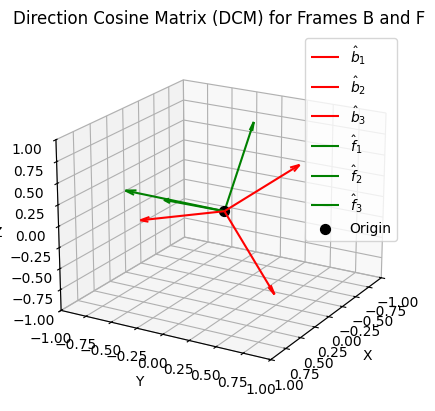

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, b1_np[0], b1_np[1], b1_np[2], color='r', label='$\\hat{b}_1$', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, b2_np[0], b2_np[1], b2_np[2], color='r', label='$\\hat{b}_2$', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, b3_np[0], b3_np[1], b3_np[2], color='r', label='$\\hat{b}_3$', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, f1_np[0], f1_np[1], f1_np[2], color='g', label='$\\hat{f}_1$', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, f2_np[0], f2_np[1], f2_np[2], color='g', label='$\\hat{f}_2$', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, f3_np[0], f3_np[1], f3_np[2], color='g', label='$\\hat{f}_3$', arrow_length_ratio=0.1)

ax.scatter(0, 0, 0, color='black', s=50, label='Origin')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

ax.view_init(elev=20, azim=30)

ax.legend(loc='upper right')
ax.set_title('Direction Cosine Matrix (DCM) for Frames B and F')

plt.show()

---

## 2.
Let the DCM be given by:

$$
[BN] = \begin{bmatrix} 
-0.87097 & 0.45161 & 0.19355\\ 
-0.19355 & -0.67742 & 0.70968 \\ 
0.45161 & 0.58065 & 0.67742 
\end{bmatrix}
$$

while the angular velocity vector is:

$$
{\omega}_{B/N} = \begin{bmatrix}
0.1 \\
0.2 \\
0.3
\end{bmatrix}
$$

What are the corresponding DCM rates?


In [13]:
N = ReferenceFrame('N')
B = ReferenceFrame('B')

NB = sm.Matrix([[-0.87097, -0.19355, 0.45161],
                [0.45161, -0.67742, 0.58065],
                [0.19355, 0.70968, 0.67742]])
BN = NB.transpose()
wBN = 0.1*B.x + 0.2*B.y + 0.3*B.z

B.orient_dcm(N, BN)
B.set_ang_vel(N, wBN)

In [14]:
def cross_product(x, R):
    '''
    Matrix Cross Product from provided vector (x) and reference frame (R)
    '''
    x1 = x.to_matrix(R)[0]
    x2 = x.to_matrix(R)[1]
    x3 = x.to_matrix(R)[2]
    
    return sm.Matrix([[0, -x3, x2],
                      [x3, 0, -x1],
                      [-x2, x1, 0]])

In [16]:
dcm_rate = -cross_product(wBN, B)*B.dcm(N)
print(np.array(dcm_rate).astype(np.float64))

[[-0.148387 -0.319356  0.07742 ]
 [ 0.306452 -0.077418  0.009677]
 [-0.154839  0.158064 -0.032258]]
